<a href="https://colab.research.google.com/github/Gab-mf/wallmart-weekly-salles/blob/main/walmart_sales_ML_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# walmart sales ML prediction 🛒 📈


In [ ]:
import pandas as pd

In [ ]:
# importing file.csv
df = pd.read_csv("Walmart.csv")

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# descriptive analysis
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-119-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mes
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10


In [ ]:
# creating columns 'mes' = 'month'
df['mes'] = pd.to_datetime(df['Date']).dt.month
df['mes']

0        5
1       12
2        2
3        2
4        5
        ..
6430     9
6431     5
6432    12
6433    10
6434    10
Name: mes, Length: 6435, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# grouping sales by holiday and non-holiday
vendas_por_feriado = df.groupby(['Holiday_Flag'])['Weekly_Sales'].sum().reset_index()
vendas_por_feriado

,Holiday_Flag,Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


In [ ]:
import matplotlib.pyplot as plt

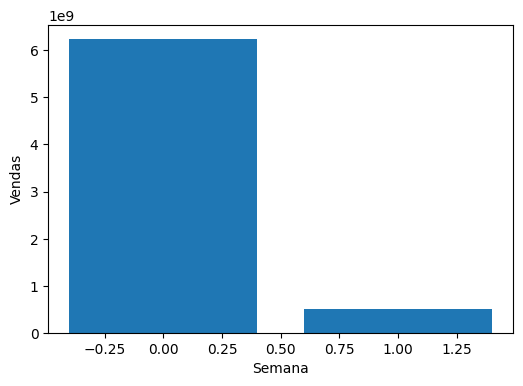

In [ ]:
plt.figure(figsize=(6,4))

plt.bar(vendas_por_feriado['Holiday_Flag'], vendas_por_feriado['Weekly_Sales'])

plt.xlabel("Semana")
plt.ylabel("Vendas")

plt.show()

In [ ]:
df_vendas_agrupado = round(df.groupby(pd.Grouper(key='Date', axis=0, freq='M')).sum().reset_index(), 2)
df_vendas_agrupado

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mes
0,2010-01-31,1035,4.223988e+07,0,3144.06,123.04,7575.96,381.39,45
1,2010-02-28,4140,1.915869e+08,0,9324.79,493.96,30219.86,1537.42,360
2,2010-03-31,4140,1.862262e+08,0,9740.74,507.29,30262.32,1536.41,540
3,2010-04-30,4140,1.838118e+08,0,11086.93,516.20,30186.01,1529.59,720
4,2010-05-31,6210,2.806119e+08,0,14713.65,766.33,45328.08,2304.32,1350
5,2010-06-30,3105,1.424361e+08,0,10455.89,374.93,22690.18,1144.08,810
6,2010-07-31,4140,1.842664e+08,0,13716.76,505.11,30223.63,1520.26,1260
7,2010-08-31,4140,1.845381e+08,0,13383.78,500.11,30289.05,1519.25,1440
8,2010-09-30,4140,1.797041e+08,0,12584.09,499.99,30250.32,1520.26,1620
9,2010-10-31,5175,2.311201e+08,45,13087.01,640.84,37896.81,1904.84,2250


In [ ]:
#grouping sales by date

df_agrupado_data = df.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
df_agrupado_data

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [ ]:
# grouping sales by month
df_agrupado_mes = df.groupby(['mes'])['Weekly_Sales'].sum().reset_index()
df_agrupado_mes

,mes,Weekly_Sales
0,1,4.264263e+08
1,2,5.220257e+08
2,3,5.534864e+08
3,4,6.453239e+08
4,5,6.056966e+08
5,6,5.750180e+08
6,7,5.933139e+08
7,8,5.642317e+08
8,9,5.905323e+08
9,10,6.029189e+08


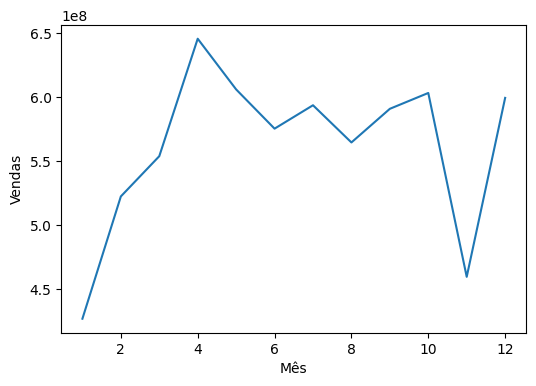

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(df_agrupado_mes['mes'], df_agrupado_mes['Weekly_Sales'])

plt.xlabel("Mês")
plt.ylabel("Vendas")

plt.show()

In [ ]:
holidays_list = [pd.Timestamp('2010-02-12'),pd.Timestamp('2011-02-11'),pd.Timestamp('2012-02-10'),pd.Timestamp('2013-02-8'),
                pd.Timestamp('2010-09-10'), pd.Timestamp('2011-09-9'), pd.Timestamp('2012-09-7'), pd.Timestamp('2013-09-6'),
                 pd.Timestamp('2010-11-26'),pd.Timestamp('2011-11-25'), pd.Timestamp('2012-11-23'), pd.Timestamp('2013-11-29'),
                 pd.Timestamp('2010-12-31'), pd.Timestamp('2011-12-30'), pd.Timestamp('2012-12-28'), pd.Timestamp('2013-12-27')]

In [ ]:
# creating 'holidays_df' dataframe to analyze sales by holiday
holidays_df = df[df['Date'].isin(holidays_list)]

In [ ]:
holidays_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mes
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962,9
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866,11
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866,12
...,...,...,...,...,...,...,...,...,...
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,11
6339,45,2010-12-31,679156.20,1,29.67,3.179,182.571448,8.724,12
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,9
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,11


In [ ]:
holidays_dict = {'super bowl' : [pd.Timestamp('2010-02-12'),pd.Timestamp('2011-02-11'),pd.Timestamp('2012-02-10'),pd.Timestamp('2013-02-8')] ,
            'labour day':[pd.Timestamp('2010-09-10'), pd.Timestamp('2011-09-9'), pd.Timestamp('2012-09-7'), pd.Timestamp('2013-09-6')] ,
             'thanksgiving':[pd.Timestamp('2010-11-26'),pd.Timestamp('2011-11-25'), pd.Timestamp('2012-11-23'), pd.Timestamp('2013-11-29')],
              'christmas':[pd.Timestamp('2010-12-31'), pd.Timestamp('2011-12-30'), pd.Timestamp('2012-12-28'), pd.Timestamp('2013-12-27')] }

In [ ]:
feriados = []
datas = []

for feriado, lista_datas in holidays_dict.items():
  for data in lista_datas:
   feriados.append(feriado)
   datas.append(data)

df_aux = pd.DataFrame({'Date': datas, 'feriado': feriados})

In [ ]:
df_aux

,Date,feriado
0,2010-02-12,super bowl
1,2011-02-11,super bowl
2,2012-02-10,super bowl
3,2013-02-08,super bowl
4,2010-09-10,labour day
5,2011-09-09,labour day
6,2012-09-07,labour day
7,2013-09-06,labour day
8,2010-11-26,thanksgiving
9,2011-11-25,thanksgiving


In [ ]:
holidays_df = holidays_df.merge(df_aux, on='Date', how='left')

In [ ]:
holidays_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,mes,feriado
0,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11,thanksgiving
1,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,christmas
2,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962,9,labour day
3,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866,11,thanksgiving
4,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866,12,christmas
...,...,...,...,...,...,...,...,...,...,...
220,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,11,thanksgiving
221,45,2010-12-31,679156.20,1,29.67,3.179,182.571448,8.724,12,christmas
222,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,9,labour day
223,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,11,thanksgiving


In [ ]:
vendas_cada_feriado = round(holidays_df.groupby(['feriado'])['Weekly_Sales'].sum().sort_values(ascending=False).reset_index(), 2)
vendas_cada_feriado

,feriado,Weekly_Sales
0,thanksgiving,1.324146e+08
1,christmas,8.647498e+07
2,labour day,4.676323e+07


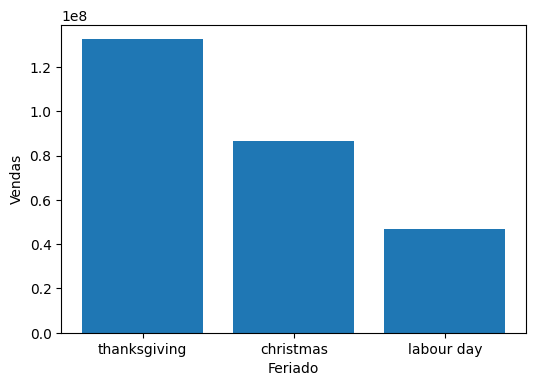

In [ ]:
plt.figure(figsize=(6,4))

plt.bar(vendas_cada_feriado['feriado'], vendas_cada_feriado['Weekly_Sales'])

plt.xlabel("Feriado")
plt.ylabel("Vendas")

plt.show()


In [ ]:
#feature enginer
df['day'] = pd.to_datetime(df['Date']).dt.day
df['year'] = pd.to_datetime(df['Date']).dt.year

In [ ]:
df.drop(columns='Date', inplace=True)

In [ ]:
# preprocessing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [ ]:
# dividing and training the base
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X = df_norm.drop(columns='Weekly_Sales')
y = df_norm[['Weekly_Sales']]


In [ ]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
r_sq = lr.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.14674235978481065


In [ ]:
import numpy as np

In [201]:
y_pred_train_lr = lr.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr)))

MAE: 0.7650652350512175
MSE: 0.8608835456536171
RMSE: 0.9278381031481824


In [202]:
y_pred_lr = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 0.7469830287650403
MSE: 0.8227540184614787
RMSE: 0.9070578914608917


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100, random_state=42)

RFR.fit(X_train, y_train)

<ipython-input-162-7e3c6cee5b0f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
r_sq = RFR.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.9864213998920731


In [203]:
y_pred_train_rfr = RFR.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train_rfr))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_rfr)))

MAE: 0.04214422837783337
MSE: 0.006401058270603453
RMSE: 0.08000661391787214


In [204]:
y_pred_rfr = RFR.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

MAE: 0.11350697753167306
MSE: 0.04228876745722047
RMSE: 0.20564232895301607


In [ ]:
# XGBoost Regression
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
r_sq = xgb.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.991921804641016


In [205]:
y_pred_train_xgb = xgb.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train_xgb))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_xgb)))

MAE: 0.0411793243489391
MSE: 0.0036984676620778986
RMSE: 0.06081502825846502


In [206]:
y_pred_xgb = xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

MAE: 0.09499250230516337
MSE: 0.025597106146608605
RMSE: 0.15999095645257141


In [210]:
resultados = pd.DataFrame(data={'Model':['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor'],
                                'R^2': [f'{lr.score(X, y):.4f}', f'{RFR.score(X, y):.4f}', f'{xgb.score(X, y):.4f}'],
                                'MAE train': [f'{metrics.mean_absolute_error(y_train, y_pred_train_lr):.4f}', f'{metrics.mean_absolute_error(y_train, y_pred_train_rfr):.4f}', f'{metrics.mean_absolute_error(y_train, y_pred_train_xgb):.4f}'],
                                'MAE test': [f'{metrics.mean_absolute_error(y_test, y_pred_lr):.4f}', f'{metrics.mean_absolute_error(y_test, y_pred_rfr):.4f}', f'{metrics.mean_absolute_error(y_test, y_pred_xgb):.4f}'],
                                'MSE train': [f'{metrics.mean_squared_error(y_train, y_pred_train_lr):.4f}', f'{metrics.mean_squared_error(y_train, y_pred_train_rfr):.4f}', f'{metrics.mean_squared_error(y_train, y_pred_train_xgb):.4f}'],
                                'MSE test' : [f'{metrics.mean_squared_error(y_test, y_pred_lr):.4f}', f'{metrics.mean_squared_error(y_test, y_pred_rfr):.4f}', f'{metrics.mean_squared_error(y_test, y_pred_xgb):.4f}'],
                                'RMSE train': [f'{np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr)):.4f}', f'{np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_rfr)):.4f}', f'{np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_xgb)):.4f}'],
                                'RMSE test': [f'{np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)):.4f}', f'{np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)):.4f}', f'{np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)):.4f}']})
resultados

,Model,R^2,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
0,Linear Regression,0.1467,0.7651,0.7470,0.8609,0.8228,0.9278,0.9071
1,Random Forest Regressor,0.9864,0.0421,0.1135,0.0064,0.0423,0.0800,0.2056
2,XGBoost Regressor,0.9919,0.0412,0.0950,0.0037,0.0256,0.0608,0.1600


In [219]:
# making predictions with models
c = [i for i in range(0, 1287)]


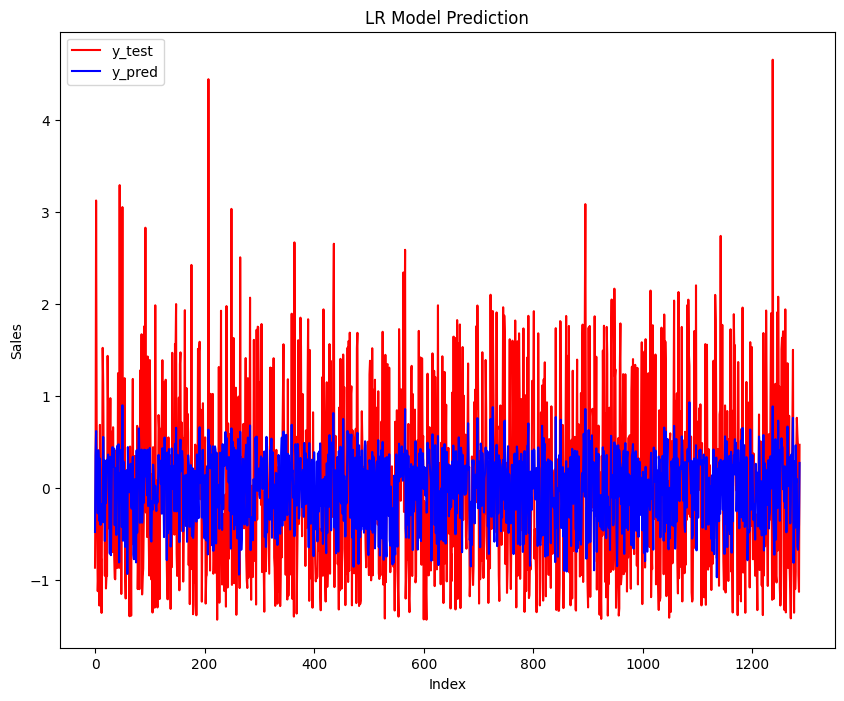

In [216]:
plt.figure(figsize=(10,8))

plt.plot(c, y_test, color='red', label='y_test')
plt.plot(c, y_pred_lr, color='blue', label='y_pred')
plt.legend()

plt.title("LR Model Prediction")
plt.xlabel("Index")
plt.ylabel("Sales")

plt.show()

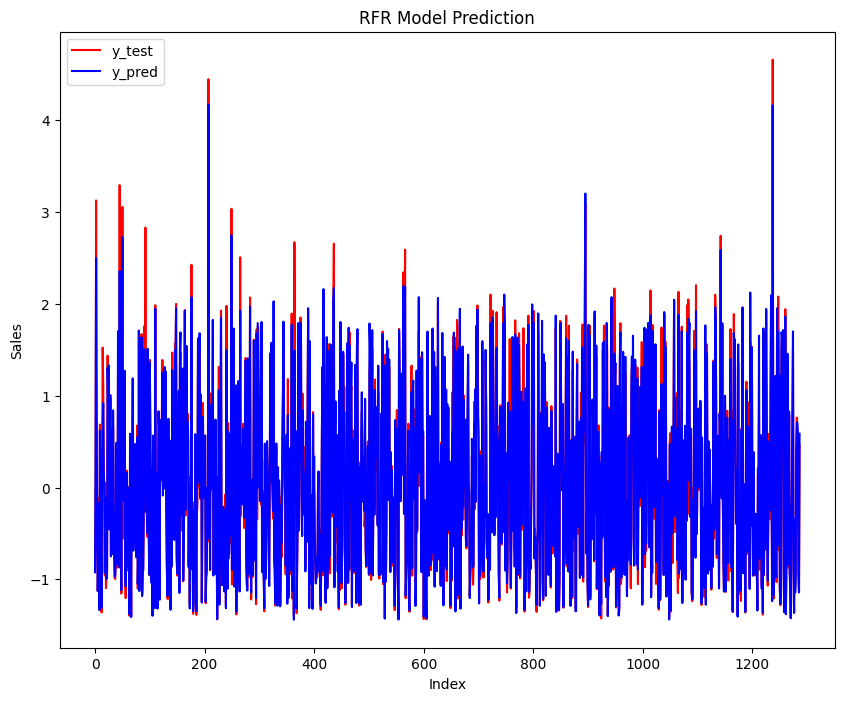

In [217]:
plt.figure(figsize=(10,8))

plt.plot(c, y_test, color='red', label='y_test')
plt.plot(c, y_pred_rfr, color='blue', label='y_pred')
plt.legend()

plt.title("RFR Model Prediction")
plt.xlabel("Index")
plt.ylabel("Sales")

plt.show()

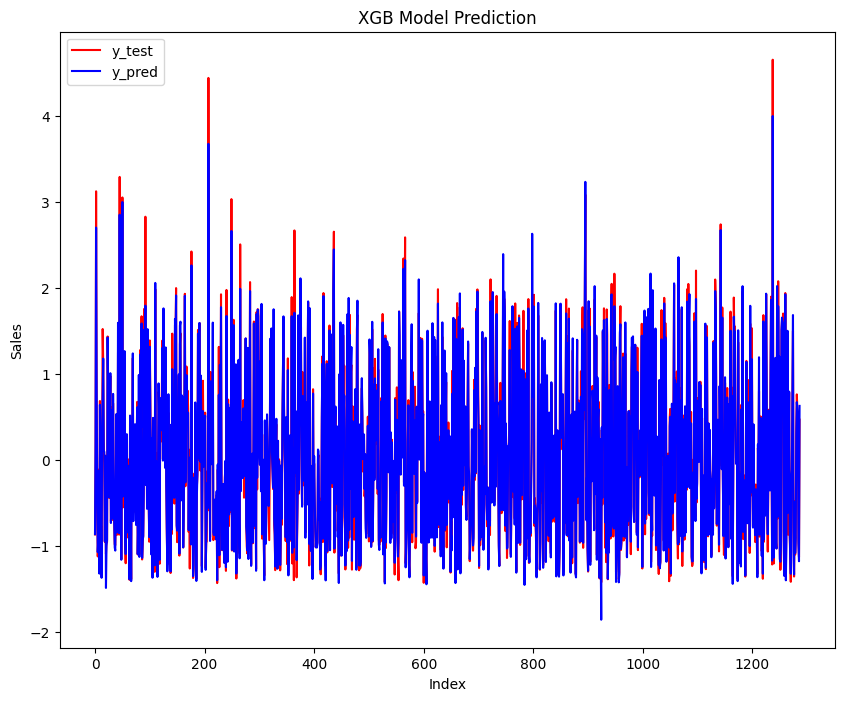

In [218]:
plt.figure(figsize=(10,8))

plt.plot(c, y_test, color='red', label='y_test')
plt.plot(c, y_pred_xgb, color='blue', label='y_pred')
plt.legend()

plt.title("XGB Model Prediction")
plt.xlabel("Index")
plt.ylabel("Sales")

plt.show()